In [34]:
import numpy as np
from scipy.stats import pearsonr

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(x, y)

correlation_coefficient

1.0

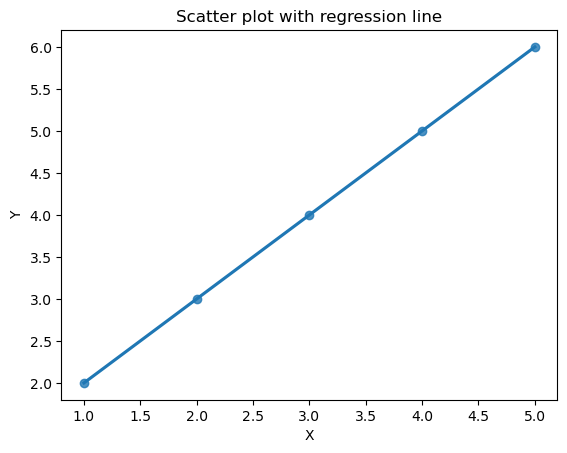

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line
sns.regplot(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with regression line')
plt.show()


In [82]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters( )
import pandas as pd
import numpy as np

In [83]:
df_ice_cream = pd.read_csv("ice_cream.csv")

In [84]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [85]:
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [86]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [87]:
df_ice_cream.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [88]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [89]:
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [90]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


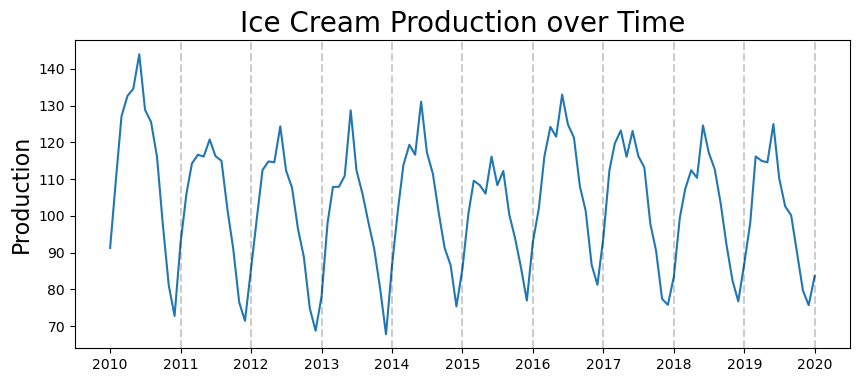

In [91]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

ACF

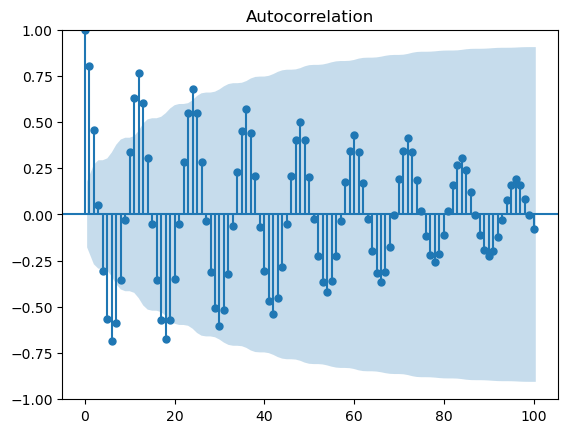

In [92]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

PACF

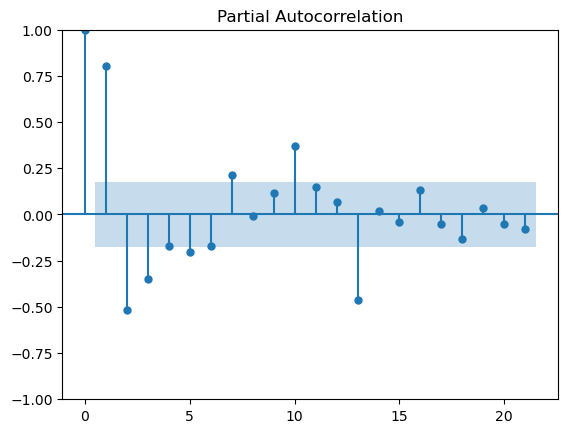

In [93]:
pacf_plot = plot_pacf(df_ice_cream.production)

on stock data

In [94]:
import yfinance as yf

In [95]:
tickerSymbol = "SPY"

In [97]:
tickerData = yf.Ticker(tickerSymbol)

In [99]:
tickerDF = tickerData.history(period="1d", start = "2015-01-01", end= "2020-01-01")

In [102]:
tickerDF = tickerDF[["Close"]]

In [106]:
tickerDF.head()

,Close
Date,
2015-01-02 00:00:00-05:00,173.704941
2015-01-05 00:00:00-05:00,170.567856
2015-01-06 00:00:00-05:00,168.961258
2015-01-07 00:00:00-05:00,171.066757
2015-01-08 00:00:00-05:00,174.102341


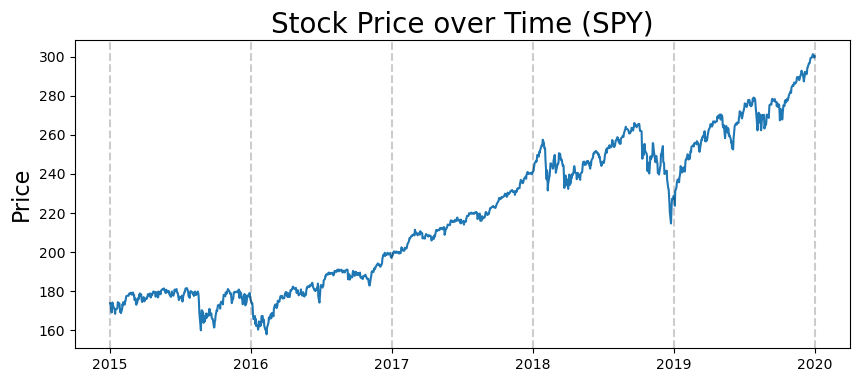

In [108]:
plt.figure(figsize=(10,4))
plt.plot(tickerDF.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [111]:
first_diffs = tickerDF.Close.values[1:] - tickerDF.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [115]:
#set first difference as variable in dataframe
tickerDF['FirstDifference'] = first_diffs

/var/folders/46/84r7k9417cqcb3npx99lns_r0000gn/T/ipykernel_12797/297464844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerDF['FirstDifference'] = first_diffs


In [117]:
tickerDF.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,173.704941,-3.137085
2015-01-05 00:00:00-05:00,170.567856,-1.606598
2015-01-06 00:00:00-05:00,168.961258,2.105499
2015-01-07 00:00:00-05:00,171.066757,3.035583
2015-01-08 00:00:00-05:00,174.102341,-1.395157


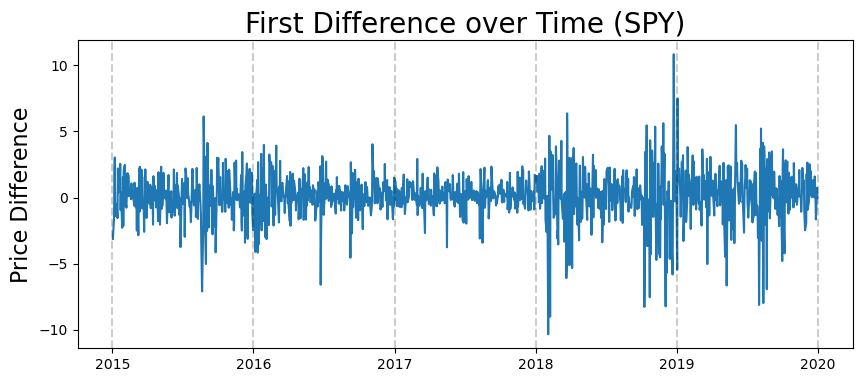

In [118]:
plt.figure(figsize=(10,4))
plt.plot(tickerDF.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

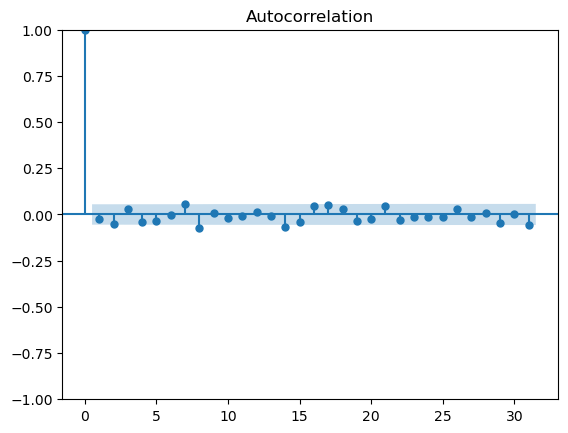

In [119]:
acf_plot = plot_acf(tickerDF.FirstDifference)